# Project 6 - A Naive Bayes Model to classify Spam in Emails

## Problem Statement:

- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

# Stage 1 - Import Libraries and Dataset

## 1.1 - Import Libraries:

In [1]:
import os

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

# import plaidml.keras
# plaidml.keras.install_backend()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.2 - Load in the Dataset:

In [3]:
path_directory = '/Users/y.s.lee/Documents/GitHub/Project-6-SpamEmailDetection/Dataset/'
data_spam = pd.read_csv(path_directory + 'emails.csv')

## 1.3 - Checkout the dataset:

In [4]:
data_spam.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
data_spam.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [6]:
data_spam.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
data_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# Stage 2 - Visualisation of the Dataset

## 2.1 - Firstly, lets have a look of the data that is either spam or non-spam:

In [12]:
non_spam = data_spam[ data_spam['spam'] == 0]
spam = data_spam[ data_spam['spam'] == 1]

In [13]:
non_spam.head()

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535


In [14]:
spam.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [18]:
data_spam.groupby('spam').describe()

length                                                                  
       count         mean          std   min     25%     50%      75%      max
spam                                                                          
0     4360.0  1631.918119  1959.664549  13.0  577.75  1122.0  2037.25  43952.0
1     1368.0  1317.257310  2271.372893  18.0  401.50   693.5  1250.25  28432.0

In [15]:
print('Spam percentage =', (len(spam)/len(data_spam))*100, "%")

Spam percentage = 23.88268156424581 %


In [16]:
print('Non-spam percentage =', (len(non_spam)/len(data_spam))*100, "%")

Non-spam percentage = 76.11731843575419 %


### 2.1.1 Visualise the Spam and Non-Spam counts:

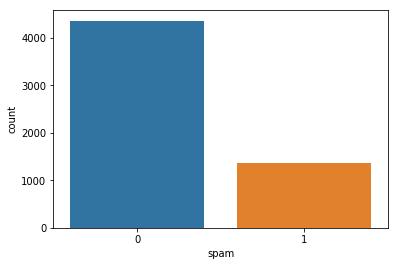

In [17]:
sns.countplot(data_spam['spam'], label = "Count Spam vs. Non-spam")

### 2.1.2 Visualise the Spam distributions:

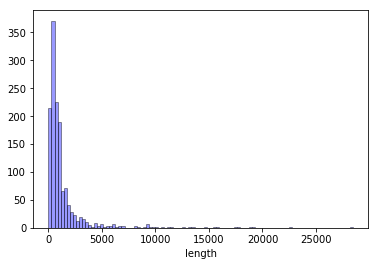

In [39]:
sns.distplot(a = spam['length'],
    bins=100,
    hist=True,
    kde=False,
    color = 'blue',
    hist_kws={'edgecolor':'black'})

### 2.1.3 Visualise the Non-spam distributions:

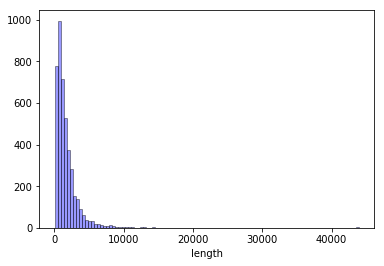

In [40]:
sns.distplot(a = non_spam['length'],
    bins=100,
    hist=True,
    kde=False,
    color = 'blue',
    hist_kws={'edgecolor':'black'})

## 2.2 Create a new column to place the lengths of each texts:

In [9]:
data_spam['length'] = data_spam['text'].apply(len)

In [10]:
data_spam.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [11]:
data_spam.tail()

,text,spam,length
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060
5727,Subject: news : aurora 5 . 2 update aurora ve...,0,2331


### 2.2.1 Visualise the 'length' column, to see the distribution:

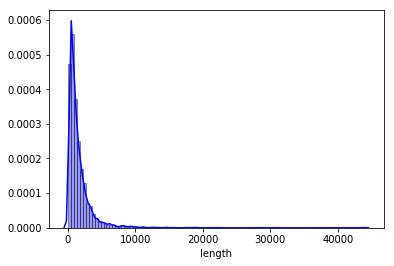

In [23]:
sns.distplot(a = data_spam['length'],
    bins=100,
    hist=True,
    kde=True,
    color = 'blue',
    hist_kws={'edgecolor':'black'})

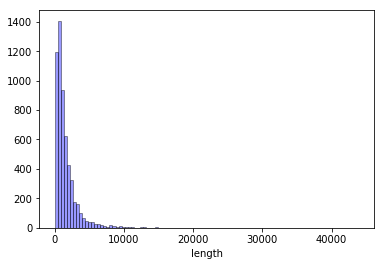

In [41]:
sns.distplot(a = data_spam['length'],
    bins=100,
    hist=True,
    kde=False,
    color = 'blue',
    hist_kws={'edgecolor':'black'})

In [24]:
data_spam.length.describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

## 2.3 Visualise the longest message:

In [28]:
maxLength_message = data_spam['length'].max()
maxLength_message

43952

In [30]:
data_spam[ data_spam['length'] == maxLength_message]

,text,spam,length
2650,Subject: from the enron india newsdesk - april...,0,43952


In [34]:
data_spam[ data_spam['length'] == maxLength_message]['text'].iloc[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

# Stage 3 - Creating the Testing and Training Dataset with the addition of Data Cleaning

## 3.1 - Count Vectorizer example: with CountVectorizer

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

sample_vectoriser = CountVectorizer()

In [45]:
X = sample_vectoriser.fit_transform(sample_data)

In [46]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [47]:
print(sample_vectoriser.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


## 3.2 - Applying the CountVectoriser to the Spam/non-spam example:

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

vectoriser = CountVectorizer()

spam_nonSpam_countVectoriser = vectoriser.fit_transform(data_spam['text'])

In [49]:
print(vectoriser.get_feature_names())

['00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012735', '000000000012736', '000000000012738', '000000000012741', '000000000012987', '000000000013085', '000000000013287', '000000000015384', '000000000015793', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '0005', '0006', '00076', '0009249480', '0009249481', '0009249504', '0009249505', '0009249506', '001', '0011', 

In [50]:
print(spam_nonSpam_countVectoriser.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


The above can be considered features to be used in the Naive Bayes classifier.

In [52]:
spam_nonSpam_countVectoriser.shape

(5728, 37303)

# Stage 4 - Training the Model

In [53]:
label = data_spam['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0])

In [55]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()

NB_classifier.fit(X = spam_nonSpam_countVectoriser, y = label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### Create test sample to check out the model prediction capability:

In [57]:
testing_sample = ['Free money!!!', 'Hi Kim, Please let me know if you need further information.']
testing_sample_countVectoriser = vectoriser.transform(testing_sample)

In [58]:
test_predictions = NB_classifier.predict(testing_sample_countVectoriser)
test_predictions

array([1, 0])

1 = spam and 0 = non-spam.

#### Test another example:

In [59]:
testing_sample = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']
testing_sample_countVectoriser = vectoriser.transform(testing_sample)

In [60]:
test_predictions = NB_classifier.predict(testing_sample_countVectoriser)
test_predictions

array([0, 1])

1 = spam and 0 = non-spam.

# Stage 5 - Dividing the Dataset into Training and Testing sets

In [61]:
# Training Data:

X = spam_nonSpam_countVectoriser

y = label

In [62]:
X.shape, y.shape

((5728, 37303), (5728,))

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Stage 6 - Train the model

In [64]:
from sklearn.naive_bayes import MultinomialNB

NB_Classifier = MultinomialNB()
NB_Classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Stage 7 - Model Evaluation

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

### 7.1 Evaluate the Training results:

In [66]:
y_predict_train = NB_Classifier.predict(X_train)
y_predict_train

array([1, 1, 1, ..., 0, 0, 0])

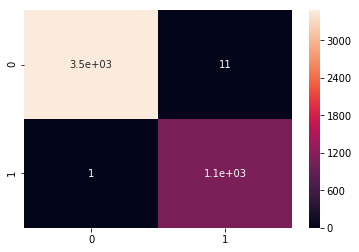

In [68]:
cm = confusion_matrix(y_true = y_train, y_pred = y_predict_train)
sns.heatmap(cm, annot = True)

### 7.2 Evaluate the Testing results:

In [69]:
y_predict_test = NB_Classifier.predict(X_test)
y_predict_test

array([0, 0, 1, ..., 0, 1, 0])

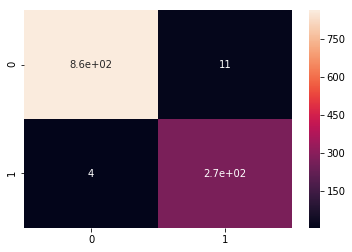

In [70]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict_test)
sns.heatmap(cm, annot = True)

### 7.3 Classification report: Testing set

In [72]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       872
           1       0.96      0.99      0.97       274

   micro avg       0.99      0.99      0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146

